# Exercice 2 - Output Data Analysis

### Authors: Lluís Mas & Radu Spaimoc

# Objective

<img src="Simulation_scenario.png" width=500 height=350 />

From the previous scenario our objectives are:
<ul>
    <li> Compute the number of packet losses and bytes transferred. </li>
    <li> Compute the congestion window. </li>
</ul>
Also we will extract:
<ul>
    <li> Packet losses and transferred bytes table. </li>
    <li> Congestion windows plots. </li>
</ul>

# Requirements

In [ ]:
# Unncomment the following lines in order to install requirements:
# pip install pandas
# pip install numpy
# pip install matplotlib
# pip install nltk

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# Reading data

### NS Trace format:

In [76]:
trace_format = [
    'Event Type', 
    'Time', 
    'Source Node', 
    'Dest Node', 
    'Segment Type', 
    'Segment Size', 
    'Flags', 
    'Flow Id', 
    'Source Address', 
    'Destination Address', 
    'Segment Number', 
    'Segment Identifier'
]

In [77]:
metrics_format = [
    'Node', 
    'Time', 
    'RTT', 
    'SRTT', 
    'CWND', 
    'CWMAX', 
    'Backoff'
]

### Trace.tr

In [78]:
trace = pd.read_csv('trace.tr', sep=' ', names=trace_format)
trace

,Event Type,Time,Source Node,Dest Node,Segment Type,Segment Size,Flags,Flow Id,Source Address,Destination Address,Segment Number,Segment Identifier
0,+,0.000000,2,3,tcp,1000,-------,2,2.0,4.2,0,0
1,-,0.000000,2,3,tcp,1000,-------,2,2.0,4.2,0,0
2,+,0.000000,1,3,tcp,40,-------,1,1.0,4.1,0,1
3,-,0.000000,1,3,tcp,40,-------,1,1.0,4.1,0,1
4,+,0.000000,0,3,tcp,40,-------,0,0.0,4.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
28504,r,19.995328,2,3,tcp,1000,-------,2,2.0,4.2,935,4761
28505,+,19.995328,3,4,tcp,1000,-------,2,2.0,4.2,935,4761
28506,r,19.997728,3,2,ack,40,-------,2,4.2,2.0,925,4749
28507,+,19.997728,2,3,tcp,1000,-------,2,2.0,4.2,938,4767


### Trace.rtt

In [79]:
metrics = pd.read_csv('trace.rtt', sep=' ', names=metrics_format)
metrics

,Node,Time,RTT,SRTT,CWND,CWMAX,Backoff
0,0,0.0,0.00,0.00,1.00000,40,0.0
1,1,0.0,0.00,0.00,1.00000,40,0.0
2,2,0.0,0.00,0.00,1.00000,40,0.0
3,0,0.1,0.00,0.00,1.00000,40,0.0
4,1,0.1,0.00,0.00,1.00000,40,0.0
...,...,...,...,...,...,...,...
595,1,19.8,0.24,0.24,11.14090,40,0.0
596,2,19.8,0.23,0.24,13.45880,40,0.0
597,0,19.9,0.24,0.23,9.07844,40,0.0
598,1,19.9,0.26,0.24,11.40800,40,0.0


# Packet losses

<img src="event_types.png" width=500 height=350 />

As we can see in the previous image of the **ns trace format**, event types with (d) are dropped.

In [80]:
lost_pckg = trace[trace['Event Type'] == 'd']
lost_pckg

,Event Type,Time,Source Node,Dest Node,Segment Type,Segment Size,Flags,Flow Id,Source Address,Destination Address,Segment Number,Segment Identifier
684,d,0.763872,3,4,tcp,1000,-------,2,2.0,4.2,13,121
701,d,0.772320,3,4,tcp,1040,-------,1,1.0,4.1,32,124
718,d,0.780640,3,4,tcp,1040,-------,1,1.0,4.1,34,127
733,d,0.788960,3,4,tcp,1040,-------,1,1.0,4.1,36,130
748,d,0.797280,3,4,tcp,1040,-------,1,1.0,4.1,38,133
817,d,0.838880,3,4,tcp,1040,-------,0,0.0,4.0,32,144
834,d,0.847200,3,4,tcp,1040,-------,0,0.0,4.0,34,147
849,d,0.855520,3,4,tcp,1040,-------,0,0.0,4.0,36,150
864,d,0.863840,3,4,tcp,1040,-------,0,0.0,4.0,38,153
4889,d,3.891232,3,4,tcp,1040,-------,1,1.0,4.1,100,824


In [81]:
lost_pckg.shape[0]

22

A total of **22** packets were lost.

In [82]:
lost_pckg['Source Address'].value_counts(dropna=False)

1.0    11
0.0    10
2.0     1
Name: Source Address, dtype: int64

As we can conclude that a total of **22** packages were lost, the corresponding number by node are as it follows:

**Node 0:** 10

**Node 1:** 11

**Node 2:** 1

# Bytes Transferred

In [83]:
trans = trace[trace['Event Type'] == '-']
trans

,Event Type,Time,Source Node,Dest Node,Segment Type,Segment Size,Flags,Flow Id,Source Address,Destination Address,Segment Number,Segment Identifier
1,-,0.000000,2,3,tcp,1000,-------,2,2.0,4.2,0,0
3,-,0.000000,1,3,tcp,40,-------,1,1.0,4.1,0,1
5,-,0.000000,0,3,tcp,40,-------,0,0.0,4.0,0,2
8,-,0.020064,3,4,tcp,40,-------,1,1.0,4.1,0,1
11,-,0.020384,3,4,tcp,40,-------,0,0.0,4.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
28496,-,19.989728,2,3,tcp,1000,-------,2,2.0,4.2,937,4765
28497,-,19.992224,3,4,tcp,1000,-------,2,2.0,4.2,931,4730
28500,-,19.993904,4,3,ack,40,-------,0,4.0,0.0,719,4766
28503,-,19.994304,3,0,ack,40,-------,0,4.0,0.0,713,4753


In [84]:
trans['Segment Size'].sum()

5075680

A total of **5.075.680** bytes were transferred. Let's see the bytes transferred by each node:

In [85]:
trans.groupby(['Source Node'])['Segment Size'].sum()

Source Node
0     765480
1     759240
2     940000
3    2516560
4      94400
Name: Segment Size, dtype: int64

We can conclude that the bytes tranferred were:

**Node 0:** 765.480

**Node 1:** 759.240

**Node 2:** 940.000

**Node 3:** 2.516.560

**Node 4:** 94.400

**Total:** 5.075.680    

# Congestion Window Plots

In [86]:
metrics

,Node,Time,RTT,SRTT,CWND,CWMAX,Backoff
0,0,0.0,0.00,0.00,1.00000,40,0.0
1,1,0.0,0.00,0.00,1.00000,40,0.0
2,2,0.0,0.00,0.00,1.00000,40,0.0
3,0,0.1,0.00,0.00,1.00000,40,0.0
4,1,0.1,0.00,0.00,1.00000,40,0.0
...,...,...,...,...,...,...,...
595,1,19.8,0.24,0.24,11.14090,40,0.0
596,2,19.8,0.23,0.24,13.45880,40,0.0
597,0,19.9,0.24,0.23,9.07844,40,0.0
598,1,19.9,0.26,0.24,11.40800,40,0.0


In [87]:
metrics[metrics['Node'] == 0]['CWND']

0      1.00000
3      1.00000
6      2.00000
9      3.00000
12     4.00000
        ...   
585    7.36254
588    8.14301
591    8.14301
594    8.96692
597    9.07844
Name: CWND, Length: 200, dtype: float64

In [88]:
metrics[metrics['Node'] == 1][['Time', 'CWND']]

,Time,CWND
1,0.0,1.0000
4,0.1,1.0000
7,0.2,2.0000
10,0.3,3.0000
13,0.4,4.0000
...,...,...
586,19.5,10.1995
589,19.6,10.1995
592,19.7,11.0504
595,19.8,11.1409


In [89]:
metrics[metrics['Node'] == 1]['Time'].max()

19.900000000000013

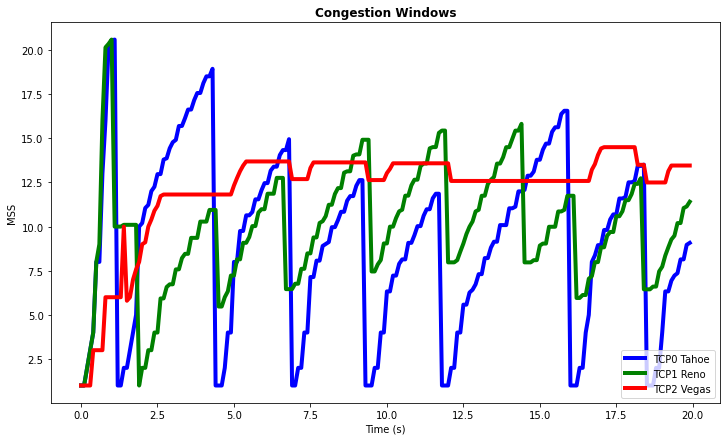

In [90]:
plt.figure(figsize=(12,7))
plt.plot(
    metrics[metrics["Node"] == 0]['Time'], 
    metrics[metrics['Node'] == 0]['CWND'], 
    label='TCP0 Tahoe', 
    linewidth=4,
    color='blue')

plt.plot(
    metrics[metrics["Node"] == 0]['Time'], 
    metrics[metrics['Node'] == 1]['CWND'], 
    label='TCP1 Reno', 
    linewidth=4,
    color='green')

plt.plot(
    metrics[metrics["Node"] == 0]['Time'], 
    metrics[metrics['Node'] == 2]['CWND'], 
    label='TCP2 Vegas', 
    linewidth=4,
    color='red')

plt.title('Congestion Windows', fontweight='bold')
plt.xlabel('Time (s)')
plt.ylabel('MSS')
plt.legend(loc='lower right')
plt.savefig('CongestionWindows.jpg')
plt.show()